## Notebook imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('data.csv')

In [48]:
df1 = df.copy()

In [49]:
# show first 5 lines of data
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
df1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [50]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [51]:
#remove whitespace from column names
df1.columns = df1.columns.str.replace(' ', '',regex=True)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [53]:
df1['Income'] = df1['Income'].str.replace('[$,]','', regex=True).astype('float')

df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'],infer_datetime_format=True,errors='raise')

In [54]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [55]:
df1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [57]:
df1.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [58]:
df1.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

In [123]:
df2 = df1.apply (pd.to_numeric, errors='coerce')
df2 = df1.dropna()

print (df2)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2014-06-16        0       189        104  

In [124]:
df2.isnull().sum().sort_values(ascending=False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

In [171]:
X = df2['MntWines'].values
y = df2['MntMeatProducts'].values

In [172]:
X = X.reshape(-1,1)

In [173]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

## Validate test train data

In [174]:
print(f'X-Train Shape [{x_train.shape}]')

X-Train Shape [(1772, 1)]


In [175]:
print(f'Y-Train Shape [{y_train.shape}]')

Y-Train Shape [(1772,)]


In [176]:
print(f'X-Test Shape [{x_test.shape}]')

X-Test Shape [(444, 1)]


In [177]:
print(f'Y-Test Shape [{y_train.shape}]')

Y-Test Shape [(1772,)]


## Data Plots

Text(0.5, 1.0, 'Training Data')

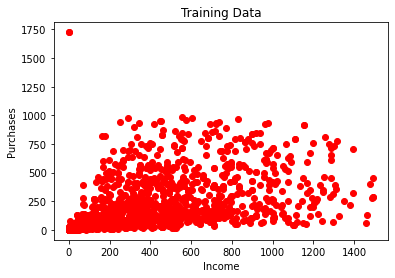

In [178]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Income')
plt.ylabel('Purchases')
plt.title('Training Data')

In [179]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [180]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

Training Accuracy 32.91%
Test Accuracy 30.35%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

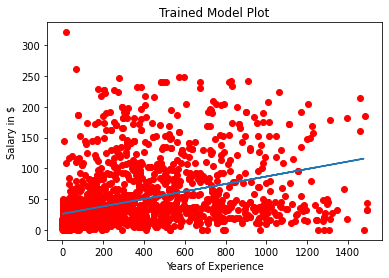

In [170]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $')
plt.title('Trained Model Plot')
plt.plot